# Worked with Natasha Collova, Brian Andrews, and Will Farner

# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

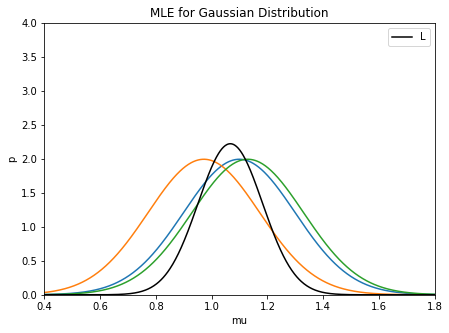

In [13]:
#Problem 2 (N=3)

#Load libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

#(Most of this lifted directly from Interference2)
#Declare constants and sample
np.random.seed(42)
N = 3
mu = 1.0
sigma = 0.2 
i=0
j=0
Ltot=1
L=[]
sample = norm(mu,sigma).rvs(N)
#print(sample)

muGrid = np.linspace(0,2,1000)

#Need to allow for variable number of data points, so
while i<N:
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))
    Ltot*=L[i]
    i+=1

fig, ax = plt.subplots(figsize=(7, 5))
while j<N:
    plt.plot(muGrid, L[j], ls='-')
    j+=1

plt.plot(muGrid, Ltot/N, ls='-', c='black', label='L')

plt.xlim(0.4, 1.8)
plt.ylim(0, 4.0)
plt.xlabel('mu') 
plt.ylabel('p')
plt.title('MLE for Gaussian Distribution')
plt.legend()

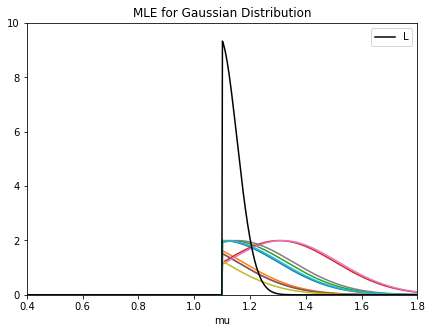

In [8]:
#Problem 2 (N=10 case)

#Load libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

#(Most of this lifted directly from Interference2)
#Declare constants and sample
np.random.seed(42)
N = 10
mu = 1.0
sigma = 0.2 
i=0
j=0
Ltot=1
min=1.1 #Want to discard all solutions below this
L=[]
sample = norm(mu,sigma).rvs(N)
#print(sample)

muGrid = np.linspace(0,2,1000)

#Need to allow for variable number of data points, so
while i<N:
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))
    L[i][muGrid<min]=0 #Just cut off everything in L corresponding to mu<1.1
    Ltot*=L[i]
    i+=1

fig, ax = plt.subplots(figsize=(7, 5))
while j<N:
    plt.plot(muGrid, L[j], ls='-')
    j+=1

plt.plot(muGrid, Ltot/N, ls='-', c='black', label='L')

plt.xlim(0.4, 1.8)
plt.ylim(0, 10.0)
plt.xlabel('mu') 
plt.ylabel('p')
plt.title('MLE for Gaussian Distribution (mu>1.1)')
plt.legend()

#We see exactly what we'd expect: the plots we'd normally create with roughly half of them chopped off.

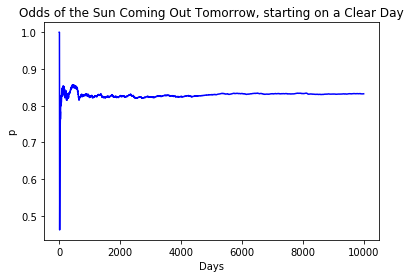

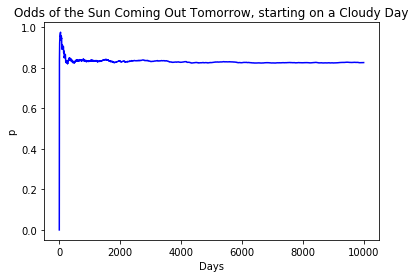

Odds of the Sun Coming Out at day N :  0.8263826382638264
Odds of the Sun Coming Out at day N + 1:  0.8264


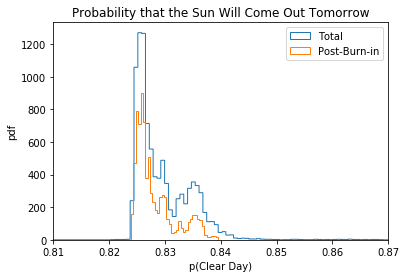

In [25]:
#Problem 3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astroML.plotting import hist as fancyhist

N = 10000 #number of days to simulate
x = np.arange(N) #For plotting
start = np.array([0,1]) #Our choice of start days: either clear or cloudy (clear=0, cloudy=1)

#We'll run two chains, one for each possible start condition
for i in range(len(start)):
    
    p_clear = [] #Stores the probability of each day being clear
    day = [] #Stores the result of each day of the simulation
    
    #Assign appropriate start day
    if start[i] == 0: #first day is clear
        p_clear.append(1.0)
        day.append(1)
    if start[i] == 1: #first day is cloudy
        p_clear.append(0)
        day.append(0)

    #Begin the chain!    
    for j in range(1,N,1):
        prob=np.random.random(1) #Choose a random value
        if day[j-1] == 1: #if today is clear 
            if prob < .1: #then there is a 10% chance its cloudy tomorrow
                day.append(0)
            else: 
                day.append(1) #Otherwise, its clear (90% chance)
        else: #if today is cloudy
            if prob < .5: #then there's a 50% chance its cloudy tomorrow
                day.append(0)
            else:
                day.append(1) #Otherwise its clear (50% chance)
        p_clear.append(np.sum(day)/len(day)) #update our probabilities
    
    #Produce plots
    if i == 0:
        plt.plot(x,p_clear,'-',color='blue')
        plt.title("Odds of the Sun Coming Out Tomorrow, starting on a Clear Day")
        plt.xlabel("Days")
        plt.ylabel("p")
        plt.show()
    if i == 1:
        plt.plot(x,p_clear,'-',color='blue')
        plt.title("Odds of the Sun Coming Out Tomorrow, starting on a Cloudy Day")
        plt.xlabel("Days")
        plt.ylabel("p")
        plt.show()
        
#Create histogram        
plt.figure()
#Eyeballing it, burn in ends around 2000
fancyhist(p_clear,bins='freedman',histtype='step',label='Total')
fancyhist(p_clear[2000:],bins='freedman',histtype='step',label='Post-Burn-in')
plt.title('Probability that the Sun Will Come Out Tomorrow')
plt.xlabel('p(Clear Day)')
plt.ylabel('pdf')
plt.xlim(0.81,0.87)
plt.legend()

#Compare days N and N+1
print("Odds of the Sun Coming Out at day N : ",p_clear[-2])
print("Odds of the Sun Coming Out at day N + 1: ",p_clear[-1])